In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import warnings 
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', None)
import plotly.express as px
import plotly.graph_objects as go

import datetime as dt
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('hotel_cleaned_data_set.csv')


In [28]:
df.isna().sum().sum()


0

## Univariate Analysis


In [14]:
df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stays,guests,kids
count,118981.000000,118981.000000,118981.000000,118981.000000,118981.000000,118981.000000,118981.000000,118981.000000,118981.000000,118981.000000,118981.000000,118981.000000,118981.000000,118981.000000,118981.000000,118981.000000
mean,0.370731,104.073751,2016.156395,27.164236,15.797094,0.031543,0.087342,0.137333,0.218514,2.325682,101.966892,0.062657,0.570629,3.425976,1.971063,0.108387
std,0.483003,106.891350,0.707723,13.598967,8.781118,0.174780,0.845714,1.499554,0.638077,17.614634,48.052048,0.245550,0.792402,2.541654,0.719452,0.404487
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.500000,0.000000,0.000000,2.000000,2.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,3.000000,2.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,4.000000,2.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,1.000000,26.000000,72.000000,18.000000,391.000000,510.000000,8.000000,5.000000,69.000000,55.000000,10.000000


In [15]:
df.describe(include = 'O')


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,reservation_status,reservation_status_date,arrival_date_full
count,118981,118981,118981,118981,118981,118981,118981,118981,118981,118981,118981,118981,118981,118981,118981
unique,2,12,4,178,7,5,9,11,3,334,349,4,3,926,793
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,9.0,No Company,Transient,Check-Out,2015-10-21,2015-12-05
freq,78935,13825,92014,48435,56220,97559,85861,73982,104233,31742,112215,89336,74871,1460,448


### Cancellations

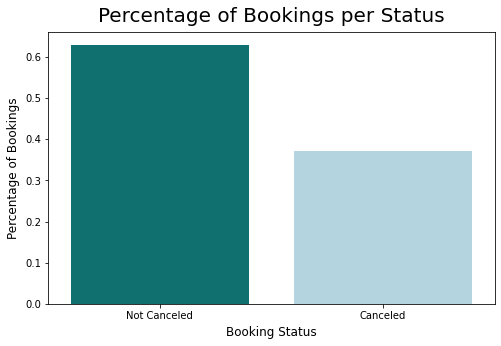

In [16]:
# Visualizing the percentage of canceled vs not canceled bookings: 
plt.figure(figsize=(8,5)) 
plt.title("Percentage of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=df['is_canceled'].unique(), y=df['is_canceled'].value_counts(normalize=True), palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

### Repeated Guests

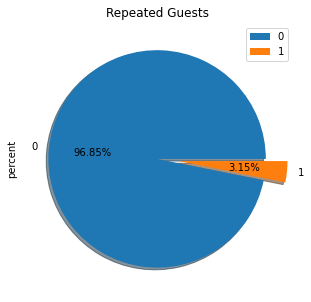

In [29]:
is_repeated_guest = df.stb.freq(['is_repeated_guest'], cum_cols = False)

plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
is_repeated_guest['percent'].plot.pie(explode = [0, 0.2], 
                                               autopct = '%1.2f%%',
                                               shadow = True
                                               )
plt.legend(is_repeated_guest['is_repeated_guest'])
plt.title('Repeated Guests')

plt.show()

### Previous Cancellation


In [18]:
df.stb.freq(['previous_cancellations'], cum_cols = False)


,previous_cancellations,count,percent
0,0,112504,94.556274
1,1,6046,5.081484
2,2,114,0.095814
3,3,65,0.054631
4,24,48,0.040343
5,11,35,0.029416
6,4,31,0.026055
7,26,26,0.021852
8,25,25,0.021012
9,6,22,0.018490


In [19]:
def cancellation(row):
    if (row['previous_cancellations'] == 0):
        return "No"
    else :
        return "Yes"

df['is_previously_cancelled'] = df.apply(cancellation, axis = 1)
df.stb.freq(['is_previously_cancelled'], cum_cols = False)

,is_previously_cancelled,count,percent
0,No,112504,94.556274
1,Yes,6477,5.443726


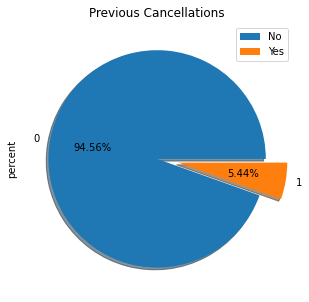

In [ ]:
is_previously_cancelled = df.stb.freq(['is_previously_cancelled'], cum_cols = False)

plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
is_previously_cancelled['percent'].plot.pie(explode = [0, 0.2], 
                                               autopct = '%1.2f%%',
                                               shadow = True
                                               )
plt.legend(is_previously_cancelled['is_previously_cancelled'])
plt.title('Previous Cancellations')

plt.show()

### Customer Type

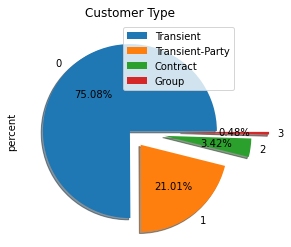

In [ ]:
customer_type = df.stb.freq(['customer_type'], cum_cols = False)


customer_type['percent'].plot.pie(explode = [0.0, 0.2, 0.4, 0.6], 
                                               autopct = '%1.2f%%',
                                               shadow = True
                                               )
plt.legend(customer_type['customer_type'])
plt.title('Customer Type')

plt.show()

### Booking Changes


In [ ]:
def changes(row):
    if (row['booking_changes'] == 0):
        return "No"
    else :
        return "Yes"

df['is_booking_changes'] = df.apply(changes, axis = 1)
df.stb.freq(['is_booking_changes'], cum_cols = False)

,is_booking_changes,count,percent
0,No,101062,84.939612
1,Yes,17919,15.060388


### Special Requests

In [25]:
df.stb.freq(['total_of_special_requests'], cum_cols = False)

,total_of_special_requests,count,percent
0,0,70131,58.943025
1,1,33082,27.804439
2,2,12910,10.850472
3,3,2480,2.084366
4,4,338,0.284079
5,5,40,0.033619


### Booking Market Segment

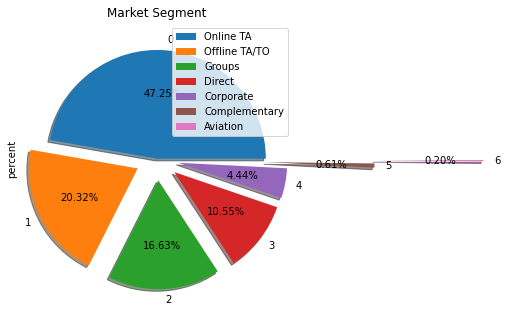

In [ ]:
market_segment = df.stb.freq(['market_segment'], cum_cols = False)
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
market_segment['percent'].plot.pie(explode = [0, 0.2, 0.2, 0.2, 0.2, 1, 2], 
                                               autopct = '%1.2f%%',
                                               shadow = True
                                               )
plt.legend(market_segment['market_segment'])
plt.title('Market Segment')
plt.show()

### Distribution Channel

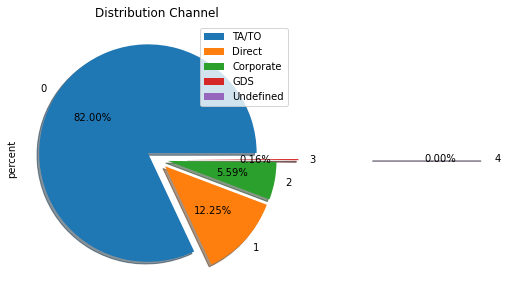

In [ ]:
distribution_channel = df.stb.freq(['distribution_channel'], cum_cols = False)
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
distribution_channel['percent'].plot.pie(explode = [0.1, 0.1, 0.1,  0.3,2], 
                                               autopct = '%1.2f%%',
                                               shadow = True
                                               )

plt.legend(distribution_channel['distribution_channel'])
plt.title('Distribution Channel')

plt.show()

### Deposit Type

Text(0.5, 1.0, 'Deposit Type')

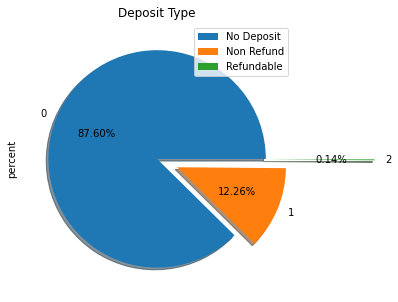

In [ ]:
deposit_type = df.stb.freq(['deposit_type'],cum_cols = False)
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
deposit_type['percent'].plot.pie(explode = [0, 0.2, 1], 
                                               autopct = '%1.2f%%',
                                               shadow = True
                                               )
plt.legend(deposit_type['deposit_type'])
plt.title('Deposit Type')

### Booking Locations

In [ ]:
df.stb.freq(['country'], cum_cols = False).head(10)


,country,count,percent
0,PRT,48435,40.708180
1,GBR,12104,10.173053
2,FRA,10376,8.720720
3,ESP,8546,7.182659
4,DEU,7271,6.111060
5,ITA,3752,3.153445
6,IRL,3370,2.832385
7,BEL,2326,1.954934
8,BRA,2212,1.859120
9,NLD,2094,1.759945


In [ ]:
country_data =  df.stb.freq(['country'], cum_cols = False)

guest_map = px.choropleth(country_data,
                    locations=country_data['country'],
                    color=country_data["percent"], 
                    hover_name=country_data['country'], 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Booking Map")
guest_map.show()


### The distribution of ADR

In [ ]:
fig = px.histogram(df, x="adr",
                  title = 'ADR Distribution'
                  )
fig.show()


### Multivariate Analysis


#### Find the most correlated features with cancellation

In [ ]:
#Applying label encoding for categorical features to find the correlation
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1=df.copy()
df1['hotel'] = le.fit_transform(df1['hotel'])
df1['agent'] = le.fit_transform(df1['agent'])
df1['company'] = le.fit_transform(df1['company'])
df1['arrival_date_month'] = le.fit_transform(df1['arrival_date_month'])
df1['meal'] = le.fit_transform(df1['meal'])
df1['country'] = le.fit_transform(df1['country'])
df1['market_segment'] = le.fit_transform(df1['market_segment'])
df1['distribution_channel'] = le.fit_transform(df1['distribution_channel'])
df1['reserved_room_type'] = le.fit_transform(df1['reserved_room_type'])
df1['assigned_room_type']= le.fit_transform(df1['assigned_room_type'])
df1['deposit_type'] = le.fit_transform(df1['deposit_type'])
df1['customer_type'] = le.fit_transform(df1['customer_type'])
df1['reservation_status'] = le.fit_transform(df1['reservation_status'])
df1['reservation_status_date'] = le.fit_transform(df1['reservation_status_date'])
df1['arrival_date_full']=le.fit_transform(df1['arrival_date_full'])

In [ ]:
df1 = df1.drop(columns = ['hotel','country','company', 'agent','reservation_status_date','assigned_room_type','reservation_status','arrival_date_full','arrival_date_year','arrival_date_week_number'], axis=1)

X = df1.drop(['is_canceled'], axis = 1)
y = df1['is_canceled']


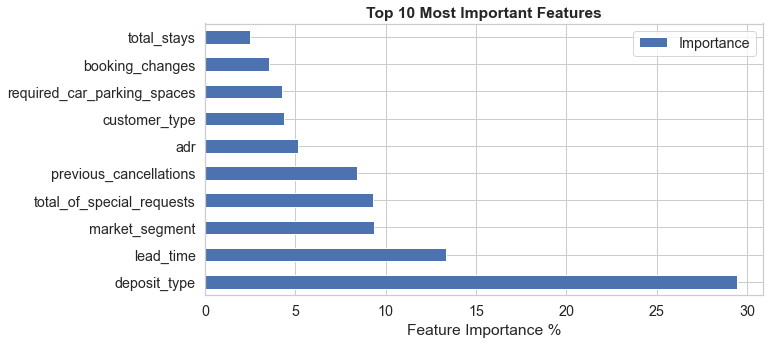

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(max_depth = 15,min_samples_leaf= 1, min_samples_split = 2,n_estimators = 200)


plt.figure(figsize =(10,5))
rf_model.fit(X,y)
feature_imp = pd.Series(rf_model.feature_importances_*100 ,index = X.columns)
feature_imp.nlargest(10).plot(kind = 'barh',label = 'Importance')
plt.legend()
plt.title('Top 10 Most Important Features',weight = 'bold')
plt.xlabel('Feature Importance %')
plt.show()

### Deposit Type and Cancellation

In [ ]:
deposit_type = pd.crosstab(df['deposit_type'], df['is_canceled'], normalize = 'index')

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=deposit_type.index, y=deposit_type[0]),
    go.Bar(name='Cancelled Booking', x=deposit_type.index, y=deposit_type[1],marker_color = 'crimson')])

fig.update_layout(barmode='group', title = 'Percentage of Booking Per Deposit Type',
                 yaxis=dict(
                 title='Percentage of booking (%) / Deposit Type',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Deposit Type',
                 titlefont_size=16,
                 tickfont_size=14,))

fig.show()

In [ ]:
df.groupby(df['deposit_type']).describe(include='all')


hotel                                                       \
               count unique           top   freq mean  std  min  25%  50%   
deposit_type                                                                
No Deposit    104233      2    City Hotel  66048  NaN  NaN  NaN  NaN  NaN   
Non Refund     14586      2    City Hotel  12867  NaN  NaN  NaN  NaN  NaN   
Refundable       162      2  Resort Hotel    142  NaN  NaN  NaN  NaN  NaN   

                       is_canceled                                           \
              75%  max       count unique top freq      mean       std  min   
deposit_type                                                                  
No Deposit    NaN  NaN    104233.0    NaN NaN  NaN  0.283797  0.450842  0.0   
Non Refund    NaN  NaN     14586.0    NaN NaN  NaN  0.993624  0.079597  0.0   
Refundable    NaN  NaN       162.0    NaN NaN  NaN  0.222222  0.417029  0.0   

                                 lead_time                              \
              25%  50%  75%  max     count unique top freq        mean   
deposit_type                                                             
No Deposit    0.0  0.0  1.0  1.0  104233.0    NaN NaN  NaN   88.767396   
Non Refund    1.0  1.0  1.0  1.0   14586.0    NaN NaN  NaN  212.921089   
Refundable    0.0  0.0  0.0  1.0     162.0    NaN NaN  NaN  152.098765   

                                                          arrival_date_year  \
                     std  min    25%    50%    75%    max             count   
deposit_type                                                                  
No Deposit     92.977100  0.0   14.0   56.0  138.0  737.0          104233.0   
Non Refund    133.320833  0.0  103.0  183.0  304.0  629.0           14586.0   
Refundable     97.581768  0.0   64.5  169.0  169.0  385.0             162.0   

                                                                             \
             unique top freq         mean       std     min     25%     50%   
deposit_type                                                                  
No Deposit      NaN NaN  NaN  2016.173899  0.703106  2015.0  2016.0  2016.0   
Non Refund      NaN NaN  NaN  2016.031469  0.730292  2015.0  2015.0  2016.0   
Refundable      NaN NaN  NaN  2016.141975  0.415047  2015.0  2016.0  2016.0   

                             arrival_date_month                                \
                 75%     max              count unique        top   freq mean   
deposit_type                                                                    
No Deposit    2017.0  2017.0             104233     12     August  12910  NaN   
Non Refund    2017.0  2017.0              14586     12  September   1953  NaN   
Refundable    2016.0  2017.0                162      9      March     83  NaN   

                                           arrival_date_week_number         \
              std  min  25%  50%  75%  max                    count unique   
deposit_type                                                                 
No Deposit    NaN  NaN  NaN  NaN  NaN  NaN                 104233.0    NaN   
Non Refund    NaN  NaN  NaN  NaN  NaN  NaN                  14586.0    NaN   
Refundable    NaN  NaN  NaN  NaN  NaN  NaN                    162.0    NaN   

                                                                            \
             top freq       mean        std   min   25%   50%    75%   max   
deposit_type                                                                 
No Deposit   NaN  NaN  27.133988  13.638458   1.0  16.0  28.0  38.00  53.0   
Non Refund   NaN  NaN  27.449609  13.331638   1.0  17.0  25.0  39.00  53.0   
Refundable   NaN  NaN  20.932099   9.797405  12.0  14.0  14.0  21.75  47.0   

             arrival_date_day_of_month                                       \
                                 count unique top freq       mean       std   
deposit_type                                                                  
No Deposit          

#### Why does Non Refund Deposit Type Are More Likely to Canceled Compared to Other Deposit Type

In [ ]:
pd.crosstab(df['deposit_type'], 'Median Lead Time', values = df['lead_time'], aggfunc = 'median')


col_0,Median Lead Time
deposit_type,
No Deposit,56
Non Refund,183
Refundable,169


In [ ]:
pd.crosstab(df['deposit_type'], 'Median ADR', values = df['adr'], aggfunc = 'median')


col_0,Median ADR
deposit_type,
No Deposit,95.67
Non Refund,86.00
Refundable,66.00


### Lead Time and Cancellation

Text(0, 0.5, 'days before arrival')

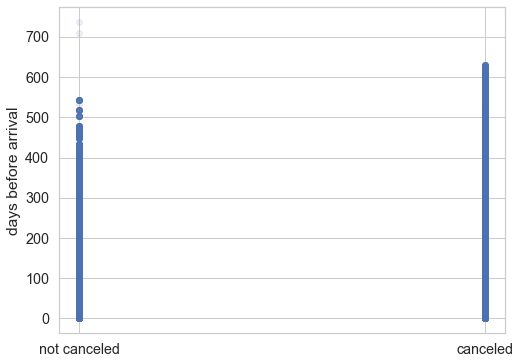

In [ ]:
lead_time = df['lead_time']
cancellations = df['is_canceled']
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(cancellations, lead_time, alpha=0.1)
ax.set_xticks([0, 1])
ax.set_xticklabels(['not canceled', 'canceled'])
ax.set_ylabel('days before arrival')

In [ ]:
lead_time_months = df['lead_time'] // 30
lead_time_months.value_counts() / len(df)
df['lead_time_month'] = df['lead_time'] // 30

lead_time_canceled =  pd.crosstab(df['lead_time_month'], df['is_canceled'], normalize = 'index')
lead_time_canceled_deposit = pd.crosstab(df['lead_time_month'], df['deposit_type'], normalize = 'index')

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=lead_time_canceled.index, y=lead_time_canceled[0]),
    go.Bar(name='Cancelled Booking', x=lead_time_canceled.index, y=lead_time_canceled[1],marker_color = 'crimson')
])
# Change the bar mode
fig.update_layout(barmode='group', title = 'Percentage of Confirmed Booking and Cancelled Booking per Lead Time Month',
                 yaxis=dict(
                 title='Percentage',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Lead Time Month',
                 titlefont_size=16,
                 tickfont_size=14,))
fig.show()


### Market Segment and Cancellation

In [ ]:
market_cancellation = pd.crosstab(df['market_segment'], df['is_canceled'], normalize = 'index')

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=market_cancellation.index, y=market_cancellation[0]),
    go.Bar(name='Cancelled Booking', x=market_cancellation.index, y=market_cancellation[1],marker_color = 'crimson')])

fig.update_layout(barmode='group', title = 'Percentage of Booking Per Market Segment',
                 yaxis=dict(
                 title='Percentage of booking (%) / Market Segment',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Market Segment',
                 titlefont_size=16,
                 tickfont_size=14,))

fig.show()

### No of Special Requests & Cancellations

In [ ]:
special_requests = pd.crosstab(df['total_of_special_requests'], df['is_canceled'], normalize = 'index')

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=special_requests.index, y=special_requests[0]),
    go.Bar(name='Cancelled Booking', x=special_requests.index, y=special_requests[1],marker_color = 'crimson')])

fig.update_layout(barmode='group', title = 'Relationship between Special Requests and Cancellations',
                 yaxis=dict(
                 title='Percentage of booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Special Requests',
                 titlefont_size=16,
                 tickfont_size=14,))

fig.show()

### Previous Cancellation & Cancellations

In [ ]:
def cancellation(row):
    if (row['previous_cancellations'] == 0):
        return 0
    else :
        return 1

df['is_previously_cancelled'] = df.apply(cancellation, axis = 1)
df.stb.freq(['is_previously_cancelled'], cum_cols = False)
pd.crosstab(df['is_previously_cancelled'], df['is_canceled'], normalize = 'index')


is_canceled,0,1
is_previously_cancelled,,
0,0.660705,0.339295
1,0.083218,0.916782


In [ ]:
is_previously_cancelled = pd.crosstab(df['is_previously_cancelled'], df['is_canceled'], normalize = 'index')

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=is_previously_cancelled.index, y=is_previously_cancelled[0]),
    go.Bar(name='Cancelled Booking', x=is_previously_cancelled.index, y=is_previously_cancelled[1],marker_color = 'crimson')])

fig.update_layout(barmode='group', title = 'Relationship between Previoud Cancellations and Cancellations',
                 yaxis=dict(
                 title='Percentage of booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Is Previously Cancelled',
                 titlefont_size=16,
                 tickfont_size=14,))

fig.show()

### ADR & Cancellations

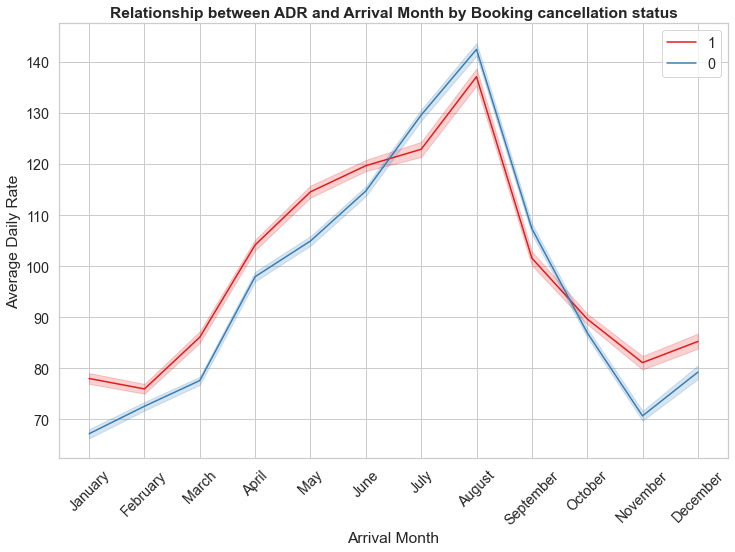

In [ ]:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=ordered_months, ordered=True)
sns.lineplot(x = "arrival_date_month", y = "adr", hue="is_canceled",hue_order= [1,0],data=df,palette= 'Set1')
plt.title("Relationship between ADR and Arrival Month by Booking cancellation status", weight = 'bold')
plt.xlabel("Arrival Month")
plt.xticks(rotation=45)
plt.ylabel("Average Daily Rate")
plt.legend(loc="upper right")
plt.show()

### Customer Type & Cancellations

In [ ]:
customer_type = pd.crosstab(df['customer_type'], df['is_canceled'], normalize = 'index')

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=customer_type.index, y=customer_type[0]),
    go.Bar(name='Cancelled Booking', x=customer_type.index, y=customer_type[1],marker_color = 'crimson')])

fig.update_layout(barmode='group', title = 'Relationship between Customer Type and Cancellations',
                 yaxis=dict(
                 title='Percentage of booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Customer Type',
                 titlefont_size=16,
                 tickfont_size=14,))

fig.show()

### No of Car Parking Spaces Required & Cancellations

In [ ]:
parking_cancel = pd.crosstab(df['required_car_parking_spaces'], df['is_canceled'], normalize = 'index')
parking_cancel

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=parking_cancel.index, y=parking_cancel[0]),
    go.Bar(name='Cancelled Booking', x=parking_cancel.index, y=parking_cancel[1])])


fig.update_layout(barmode='group', title = 'Parking Space And Cancelled Booking',
                 yaxis=dict(
                 title='Percentage of Booking / Cancelled Booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Required Parking Space',
                 titlefont_size=16,
                 tickfont_size=14,)) 
fig.show()

### Booking Changes & Cancellations

In [ ]:
def changes(row):
    if (row['booking_changes'] == 0):
        return 0
    else :
        return 1

df['is_booking_changes'] = df.apply(changes, axis = 1)
df.stb.freq(['is_booking_changes'], cum_cols = False)

,is_booking_changes,count,percent
0,0,101062,84.939612
1,1,17919,15.060388


In [ ]:
pd.crosstab(df['is_booking_changes'], df['is_canceled'], normalize = 'index')


is_canceled,0,1
is_booking_changes,,
0,0.591399,0.408601
1,0.842848,0.157152


### Customer Loyalty

#### Have around 3% of repeated guest

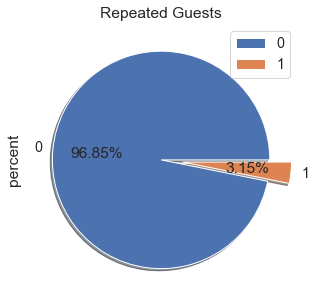

In [ ]:
is_repeated_guest = df.stb.freq(['is_repeated_guest'], cum_cols = False)

plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
is_repeated_guest['percent'].plot.pie(explode = [0, 0.2], 
                                               autopct = '%1.2f%%',
                                               shadow = True
                                               )
plt.legend(is_repeated_guest['is_repeated_guest'])
plt.title('Repeated Guests')

plt.show()
#in this dataset we only have around 3% of repeated guest, tho we still see the difference of cancellation pattern in both repeated guest and non repeated guest



#### Repeated Guest are more likely to confirm their booking compared to non repeated guest

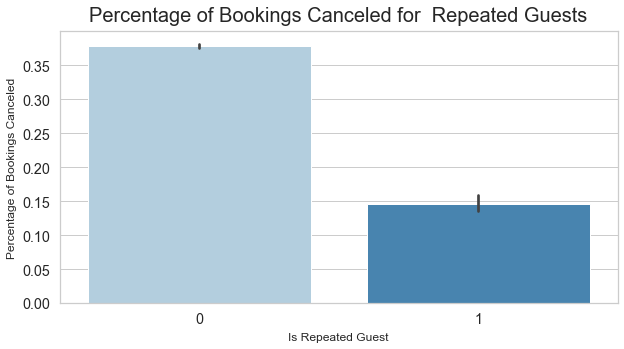

In [ ]:
# Visualizing percentage of bookings canceled for each deposit type:
plt.figure(figsize=(10,5)) 
plt.title("Percentage of Bookings Canceled for  Repeated Guests", fontsize = 20, pad = 10)
sns.barplot(x=df['is_repeated_guest'], y=df['is_canceled'], palette='Blues')
plt.xlabel("Is Repeated Guest", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings Canceled", fontsize = 12, labelpad = 5);

In [ ]:
repeated_cancelled = pd.crosstab(df['is_repeated_guest'], df['is_canceled'], normalize = 'index')


fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=['Non Repeated Booking', 'Repeated Booking'], y=repeated_cancelled[0]),
    go.Bar(name='Cancelled Booking', x=['Non Repeated Booking', 'Repeated Booking'], y=repeated_cancelled[1],marker_color = 'crimson')])

fig.update_layout(barmode='group', title = 'Percentage of Confirmed Booking and Cancelled Booking for Repeat & Non Repeat',
                 yaxis=dict(
                 title='Percentage of Booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Booking Types',
                 titlefont_size=16,
                 tickfont_size=14,))

fig.show()


####  where does all repeated guest comes from 

In [ ]:
## where does all repeated guest comes from 

repeated_distribution =  pd.crosstab(df['distribution_channel'], df['is_repeated_guest'], normalize = 'index')
repeated_distribution

fig = go.Figure(data=[
    go.Bar(name='Non Repeated Booking', x=repeated_distribution.index, y=repeated_distribution[0]),
    go.Bar(name='Repeated Booking', x=repeated_distribution.index, y=repeated_distribution[1])])


fig.update_layout(barmode='group', title = 'Percentage of Repeated Guests per Distribution Channel',
                 yaxis=dict(
                 title='Percentage of Booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Distribution Channel',
                 titlefont_size=16,
                 tickfont_size=14,)) 
fig.show()


#### Repeated Guests come in group

In [ ]:
#Repeated Guests come in group
customer_type =  pd.crosstab(df['customer_type'], df['is_repeated_guest'], normalize = 'index')

fig = go.Figure(data=[
    go.Bar(name='Non Repeated Booking', x=customer_type.index, y=customer_type[0]),
    go.Bar(name='Repeated Booking', x=customer_type.index, y=customer_type[1])])


fig.update_layout(barmode='group', title = 'Percentage of Repeated Guests per Customer Type',
                 yaxis=dict(
                 title='Percentage of Booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Customer Type',
                 titlefont_size=16,
                 tickfont_size=14,)) 
fig.show()


In [ ]:
pd.crosstab(df['is_repeated_guest'], 'Median Lead Time', values = df['lead_time'], aggfunc = 'median')


col_0,Median Lead Time
is_repeated_guest,
0,72
1,3


#### Repeated Guests have low lead time

In [ ]:
lead_time_canceled =  pd.crosstab(df['lead_time_month'], df['is_repeated_guest'], normalize = 'index')
lead_time_canceled_deposit = pd.crosstab(df['lead_time_month'], df['deposit_type'], normalize = 'index')

fig = go.Figure(data=[
    go.Bar(name='Not Repeated Booking', x=lead_time_canceled.index, y=lead_time_canceled[0]),
    go.Bar(name='Repeated Booking', x=lead_time_canceled.index, y=lead_time_canceled[1],marker_color = 'crimson')
])
# Change the bar mode
fig.update_layout(barmode='group', title = 'Percentage of Confirmed Booking and Cancelled Booking per Lead Time Month',
                 yaxis=dict(
                 title='Percentage',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Lead Time Month',
                 titlefont_size=16,
                 tickfont_size=14,))
fig.show()


#### Nights SPend by Repeated Guests

In [51]:
df['stays_group'] = pd.cut(df['total_stays'] , 
                           bins=[0, 3, 7, float('inf')], 
                           labels=['1-3', '4-7', '8+'])

# group data by stays_group and is_repeated_guest columns, and calculate sum of stays
grouped_df = df.groupby(['stays_group', 'is_repeated_guest']).agg({'total_stays': lambda x: sum(x)/sum(df['total_stays'] )})
# display the resulting grouped DataFrame
print(grouped_df) 

                               total_stays
stays_group is_repeated_guest             
1-3         No                    0.373529
            Yes                   0.012109
4-7         No                    0.466494
            Yes                   0.003246
8+          No                    0.142049
            Yes                   0.002573


In [ ]:
total = df.groupby('total_stays')['is_repeated_guest'].count()
repeats = df.groupby('total_stays')['is_repeated_guest'].sum()

In [ ]:
cutoff = 5
x = list(total.index[:cutoff])
x.append(cutoff)

y_total = list(total.values[:cutoff])
y_total.append(np.sum(total.values[cutoff:]))

y_cancel = list(repeats.values[:cutoff])
y_cancel.append(np.sum(repeats.values[cutoff:]))

Text(0.5, 0, 'total # of nights')

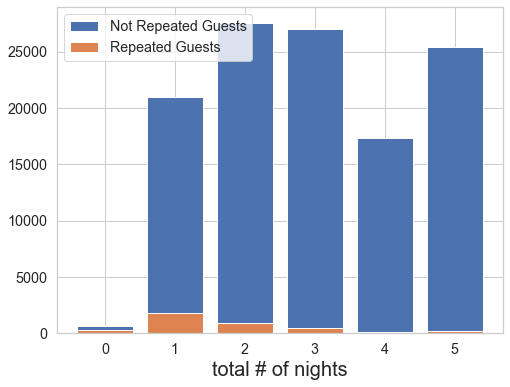

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(x, y_total, label='Not Repeated Guests')
ax.bar(x, y_cancel, label='Repeated Guests')
ax.legend()
ax.set_xticks([0, 1, 2, 3, 4,5])
ax.set_xticklabels(['0', '1', '2', '3', '4','5'])
ax.set_xlabel('total # of nights', fontsize=20)